<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [35]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
data.shape

(10841, 13)

In [37]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [38]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [40]:
data['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [41]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [42]:
data['Price'] = data['Price'].str.replace('$', '')

data['Price'].value_counts()


0        10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
1.75         1
14.00        1
4.85         1
46.99        1
1.04         1
Name: Price, Length: 93, dtype: int64

In [43]:
a = data['Size'].astype(str)
i=0
for i in range(0,a.size):
    if a[i][-1:]=="M":
        a[i]=float(a[i].replace('M',''))*1000000
    elif a[i][-1:]=="k":
        a[i]=float(a[i].replace('k',''))*1000
    elif a[i]=="Varies with device":
        a[i]=np.NaN
    else:
        pass

data['Size']=a
data['Size'].value_counts()


11000000.0    198
12000000.0    196
14000000.0    194
13000000.0    191
15000000.0    184
             ... 
429000.0        1
200000.0        1
460000.0        1
728000.0        1
619000.0        1
Name: Size, Length: 460, dtype: int64

In [44]:
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+','')
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: Installs, dtype: int64

In [45]:
data[data.Installs=="Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [46]:
data.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [47]:
data[data.Type=="0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [48]:
data.iloc[10472, :]
data=data.drop(data[data.Type=="0"].index)
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [49]:
data.Price.astype('float16')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float16

In [50]:
data.Installs.astype('int32')

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int32

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### add update year to columns

In [55]:
data['update_year']=data['Last Updated'].str[-5:].astype(int)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,update_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015


In [56]:
data['Price']= pd.to_numeric(data['Price'])

data['Installs']= pd.to_numeric(data['Installs'])
data['Size']= pd.to_numeric(data['Size'])
data['Reviews']= pd.to_numeric(data['Reviews'])
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data.info()
data['Last Updated']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  update_year     10840 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), 

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

### Missing value

In [57]:
data[data.Rating.isnull()][['Category','Reviews','Size','Installs','Price']]

,Category,Reviews,Size,Installs,Price
23,ART_AND_DESIGN,61,7000000.0,100000,0.0
113,BEAUTY,182,5700000.0,100000,0.0
123,BEAUTY,119,3700000.0,50000,0.0
126,BEAUTY,654,7400000.0,100000,0.0
129,BEAUTY,77,2900000.0,10000,0.0
...,...,...,...,...,...
10824,MEDICAL,67,82000000.0,10000,0.0
10825,SOCIAL,7,7700000.0,100,0.0
10831,MAPS_AND_NAVIGATION,38,9800000.0,5000,0.0
10835,BUSINESS,0,9600000.0,10,0.0


In [58]:
data[ data.Size.isnull()][['Category','Reviews','Size','Installs','Price']]

,Category,Reviews,Size,Installs,Price
37,ART_AND_DESIGN,36639,NaN,5000000,0.0
42,ART_AND_DESIGN,295221,NaN,10000000,0.0
52,AUTO_AND_VEHICLES,17057,NaN,1000000,0.0
67,AUTO_AND_VEHICLES,40211,NaN,5000000,0.0
68,AUTO_AND_VEHICLES,356,NaN,100000,0.0
...,...,...,...,...,...
10713,WEATHER,3471,NaN,100000,0.0
10725,MAPS_AND_NAVIGATION,8,NaN,1000,0.0
10765,SOCIAL,622,NaN,100000,0.0
10826,SOCIAL,88486,NaN,5000000,0.0


In [59]:
data[data.Rating.isnull() | data.Size.isnull()][['Category','Reviews','Size','Installs','Price']]

,Category,Reviews,Size,Installs,Price
23,ART_AND_DESIGN,61,7000000.0,100000,0.0
37,ART_AND_DESIGN,36639,NaN,5000000,0.0
42,ART_AND_DESIGN,295221,NaN,10000000,0.0
52,AUTO_AND_VEHICLES,17057,NaN,1000000,0.0
67,AUTO_AND_VEHICLES,40211,NaN,5000000,0.0
...,...,...,...,...,...
10826,SOCIAL,88486,NaN,5000000,0.0
10831,MAPS_AND_NAVIGATION,38,9800000.0,5000,0.0
10835,BUSINESS,0,9600000.0,10,0.0
10838,MEDICAL,3,9500000.0,1000,0.0


In [60]:
data=data.drop(data[data.Rating.isnull()].index)

In [61]:
data.describe()

,Rating,Reviews,Size,Installs,Price,update_year
count,9366.000000,9.366000e+03,7.729000e+03,9.366000e+03,9366.000000,9366.000000
mean,4.191757,5.140498e+05,2.295761e+07,1.789744e+07,0.960928,2017.419923
std,0.515219,3.144042e+06,2.344549e+07,9.123822e+07,15.816585,1.102705
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000,2010.000000
25%,4.000000,1.862500e+02,5.300000e+06,1.000000e+04,0.000000,2017.000000
50%,4.300000,5.930500e+03,1.400000e+07,5.000000e+05,0.000000,2018.000000
75%,4.500000,8.153275e+04,3.300000e+07,5.000000e+06,0.000000,2018.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,2018.000000


In [62]:
data['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [63]:
data['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [64]:
data['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [65]:
data['Genres'].value_counts().reset_index()[0:120]

,index,Genres
0,Tools,733
1,Entertainment,533
2,Education,468
3,Action,358
4,Productivity,351
...,...,...
110,Parenting;Brain Games,1
111,Card;Brain Games,1
112,Tools;Education,1
113,Entertainment;Education,1


In [66]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

## EDA (Use Pandas)

### crosstab between (Free,paid) apps and Content Rating

In [67]:
pd.crosstab(data.Type, data['Content Rating'], normalize = "index" )

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,0.000344,0.787705,0.041748,0.050923,0.119165,0.000115
Paid,0.000000,0.853168,0.051005,0.026275,0.069552,0.000000


### determining how many percent of each category apps are free or paid

In [68]:
pd.crosstab(data.Type, data['Category'], normalize = "columns" )

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Type,,,,,,,,,,,,,,,,,,,,,
Free,0.951613,0.986301,1.0,0.955056,0.963696,1.0,0.932927,0.979487,0.974194,0.986577,...,0.786624,0.943218,0.948718,0.991597,0.992278,0.931034,0.914169,0.964602,0.975,0.906667
Paid,0.048387,0.013699,0.0,0.044944,0.036304,0.0,0.067073,0.020513,0.025806,0.013423,...,0.213376,0.056782,0.051282,0.008403,0.007722,0.068966,0.085831,0.035398,0.025,0.093333


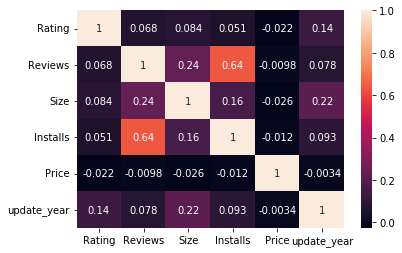

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
my_correlation = data.corr()
sns.heatmap(my_correlation,annot=True)

### DETERMING UNDER RATED  APPS 

In [478]:
underrate=data[ data.Rating < 3 ]
underrate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up
518,Just She - Top Lesbian Dating,DATING,1.9,953,19000000.0,100000,Free,0.00,Mature 17+,Dating,2018-07-18,6.3.7,5.0 and up
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19000000.0,500000,Free,0.00,Mature 17+,Dating,2018-07-31,4.8.5,4.0.3 and up
527,Sugar Daddy Dating App,DATING,2.5,277,5700000.0,100000,Free,0.00,Mature 17+,Dating,2017-12-04,3.0.0,4.1 and up
528,Adult Dirty Emojis,DATING,2.8,80,5500000.0,10000,Free,0.00,Teen,Dating,2017-11-06,1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,Employ Florida Mobile,BUSINESS,2.9,97,9900000.0,10000,Free,0.00,Everyone,Business,2018-06-13,4.5.9,4.0.3 and up
10665,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3300000.0,10000,Free,0.00,Everyone,Finance,2017-06-19,3.0.5,4.0 and up
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,234000.0,100,Free,0.00,Everyone,Personalization,2013-08-10,1.0,2.2 and up
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72000000.0,50000,Free,0.00,Everyone,Tools,2018-02-23,2.4.1,4.4 and up


### DETERMING WHICH CATEGORY APPS HAVE BETTER RATING

In [77]:
data[ data.Rating >4.5 ][['Category']].value_counts()

Category           
FAMILY                 364
GAME                   215
TOOLS                  114
HEALTH_AND_FITNESS     106
MEDICAL                101
PERSONALIZATION         84
LIFESTYLE               84
FINANCE                 74
PRODUCTIVITY            73
BOOKS_AND_REFERENCE     66
BUSINESS                66
SPORTS                  60
SOCIAL                  52
EDUCATION               49
PHOTOGRAPHY             46
SHOPPING                43
NEWS_AND_MAGAZINES      40
COMMUNICATION           26
FOOD_AND_DRINK          25
TRAVEL_AND_LOCAL        25
DATING                  25
VIDEO_PLAYERS           22
ART_AND_DESIGN          22
AUTO_AND_VEHICLES       21
EVENTS                  19
PARENTING               19
MAPS_AND_NAVIGATION     13
COMICS                  13
HOUSE_AND_HOME          11
BEAUTY                  11
LIBRARIES_AND_DEMO      10
ENTERTAINMENT            9
WEATHER                  9
dtype: int64

In [78]:
data[ data.Rating >4.5 ][data.Reviews>=5000][['Category']].value_counts()

Category           
GAME                   168
FAMILY                 129
HEALTH_AND_FITNESS      70
TOOLS                   52
PRODUCTIVITY            44
EDUCATION               44
PERSONALIZATION         34
PHOTOGRAPHY             31
FINANCE                 29
SHOPPING                28
BOOKS_AND_REFERENCE     25
LIFESTYLE               25
MEDICAL                 25
SPORTS                  23
SOCIAL                  23
VIDEO_PLAYERS           15
FOOD_AND_DRINK          13
BUSINESS                13
COMMUNICATION           12
TRAVEL_AND_LOCAL        12
AUTO_AND_VEHICLES       12
NEWS_AND_MAGAZINES      11
ART_AND_DESIGN           7
HOUSE_AND_HOME           7
MAPS_AND_NAVIGATION      7
ENTERTAINMENT            7
WEATHER                  7
PARENTING                6
DATING                   3
COMICS                   3
BEAUTY                   3
EVENTS                   1
dtype: int64

In [83]:
data[ data.Rating >4.5 ][data.Reviews>=5000][data.update_year>=2017][['Category']].value_counts()

Category           
FAMILY                 309
GAME                   197
TOOLS                  104
HEALTH_AND_FITNESS     104
MEDICAL                 95
PERSONALIZATION         74
LIFESTYLE               71
FINANCE                 70
PRODUCTIVITY            68
BUSINESS                63
SPORTS                  54
BOOKS_AND_REFERENCE     52
EDUCATION               49
SOCIAL                  45
PHOTOGRAPHY             42
SHOPPING                42
NEWS_AND_MAGAZINES      37
DATING                  25
FOOD_AND_DRINK          24
TRAVEL_AND_LOCAL        22
ART_AND_DESIGN          22
AUTO_AND_VEHICLES       21
COMMUNICATION           20
EVENTS                  19
VIDEO_PLAYERS           19
PARENTING               18
MAPS_AND_NAVIGATION     13
COMICS                  13
HOUSE_AND_HOME          11
BEAUTY                  11
LIBRARIES_AND_DEMO      10
WEATHER                  9
ENTERTAINMENT            8
dtype: int64

In [84]:
data[ data.Rating >4.5 ][data.Reviews>=5000][data.update_year<2017][['Category']].value_counts()

Category       
FAMILY             9
GAME               7
PERSONALIZATION    4
ENTERTAINMENT      1
PRODUCTIVITY       1
dtype: int64

In [ ]:
#iT SEEMS THAT AFTER 2017, THE GAMING APPS WITH A BETTER RATING AND MORE REVEIWS ARE GOING TO BE UPDATED MORE THAN THE OTHER CATEGORIES. iN ADDITION, THE 

## Send Me the Result (on Telegram)